# Analisis bivariable de la data historica

En esta sección se presentará un analisis en forma de scatter plot de las variables con respecto a la velocidad pertenecientes a la data historica, que permitan visualizar patrones, asi como su distribución asociada.

Para ello utilizaremos las librerías **pandas**, **numpy**, **os**, **glob** y **matplotlib**.

In [1]:
"""
1- Importar librerias
2- Obtener nombres de archivos de la data historica
3- Leer data desde los archivos
4- Efectuar Analisis en forma de histograma o scatter
"""

# Importamos las librerias
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import numpy as np

# Obtenemos los archivos que contienen la data
historic_files = glob.glob(os.path.join(os.getcwd()+ '/01-20190312T042227Z-001/01/Datos GPS/Datos GPS 200x200 (2018)', "*.csv"))

# Leemos la data desde los archivos
historic_data_headers = ["id_Arco", "id_Cuadrante", "Nombre_Comuna", "Fecha", "Hora", "Velocidad_Promedio", "N_puntos", "N_vehiculos"]
historic_data = pd.DataFrame(columns=historic_data_headers)

for file in historic_files:
    data = pd.read_csv(file, delimiter=';')
    historic_data = historic_data.append(data)

# Verificamos que la data se encuentre en el DataFrame
historic_data.shape

(2165713, 8)

In [2]:
#Visualizacion de las 10 primeras filas de datos
historic_data.head(10)

,id_Arco,id_Cuadrante,Nombre_Comuna,Fecha,Hora,Velocidad_Promedio,N_puntos,N_vehiculos
0,25751767,14413,Lampa,13-11-2018,15:15:00,28,1,1
1,24444592,41659,Santiago,23-08-2018,18:00:00,18,1,1
2,30679885,7608,Colina,16-04-2018,11:30:00,57,1,1
3,388587252,34497,Renca,14-05-2018,10:15:00,102,1,1
4,194278123,34528,Providencia,02-02-2018,07:00:00,5,1,1
5,255327796,6585,Lampa,04-10-2018,12:15:00,52,1,1
6,30679885,12374,Colina,11-10-2018,11:15:00,113,1,1
7,42118505,38254,Santiago,18-01-2018,13:30:00,63,1,1
8,23973708,33818,Independencia,24-10-2018,16:00:00,68,1,1
9,47566417,25638,Quilicura,29-06-2018,10:15:00,14,1,1


In [3]:
"""
    Antes de realizar las operaciones transformaremos la velocidad a un valor numerico
"""
historic_data["Velocidad_Promedio"] = pd.to_numeric(historic_data["Velocidad_Promedio"])

### Analisis de cuadrantes

Scatter plot de las velocidades promedio por cuadrante.

C:\Users\Bastolo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


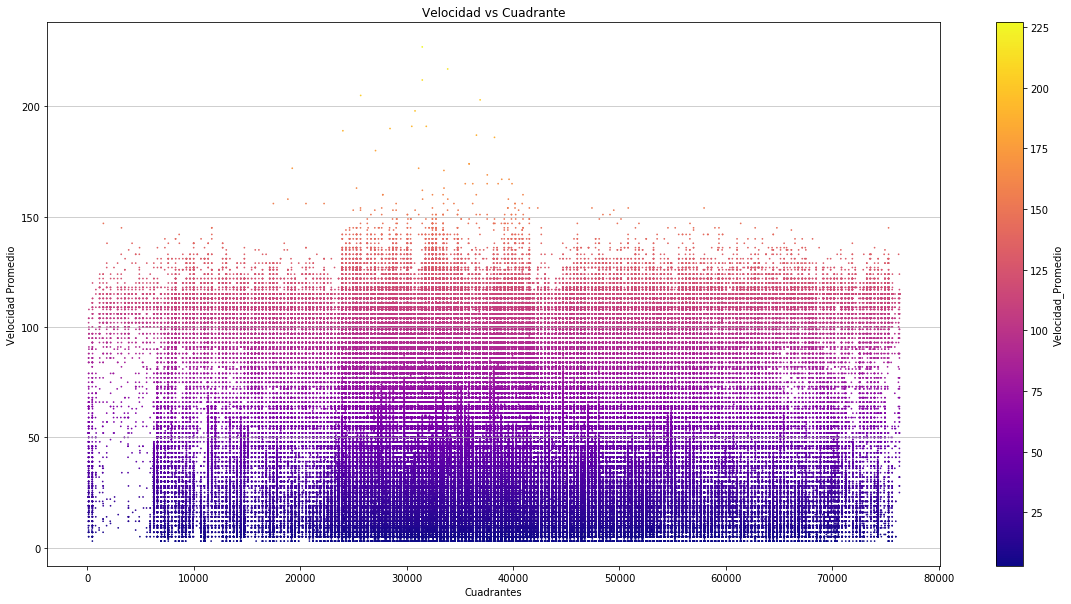

In [6]:
# Obtenemos la data en analisis y transformamos id_cuadrante a numero
vcd_df = historic_data[["Velocidad_Promedio", "id_Cuadrante"]]
vcd_df["id_Cuadrante"] = pd.to_numeric(vcd_df["id_Cuadrante"])

# Manejo de un bug que hace desaparecer los labels del eje x cuando se aplican colores
fig, ax = plt.subplots()

# Ploteo del grafico de dispersion
vcd_df.plot.scatter(x="id_Cuadrante", y="Velocidad_Promedio", c="Velocidad_Promedio", s=0.5, figsize=(20,10), colormap="plasma", ax=ax)
plt.title("Velocidad vs Cuadrante")
plt.xlabel('Cuadrantes')
plt.ylabel('Velocidad Promedio')
plt.grid(axis='y', alpha=0.75)

### Analisis de Comunas

Bar plot de las velocidades medias registradas por comuna

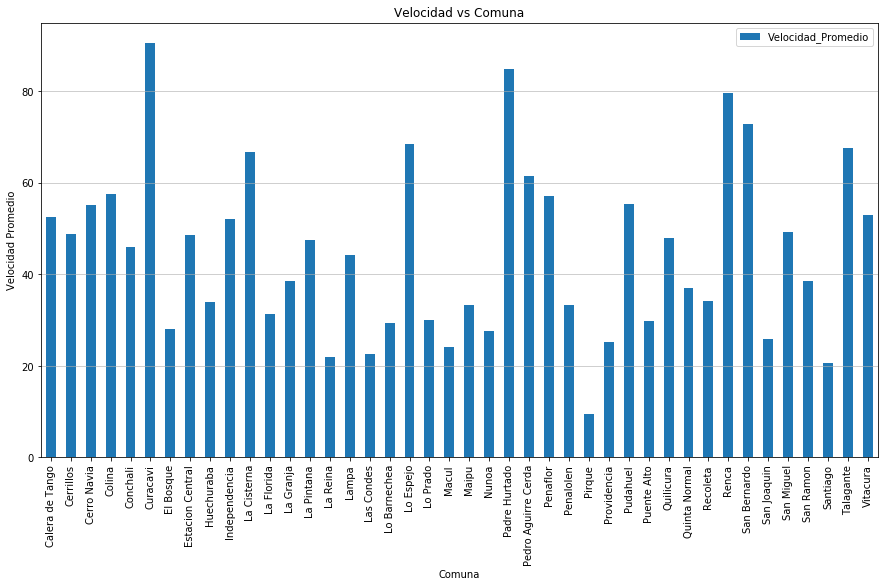

In [9]:
# Obtenemos la data
vcm_df = historic_data[["Velocidad_Promedio", "Nombre_Comuna"]]

# Agrupamos por comuna, calculamos la media y ploteamos
vcm_df.groupby(["Nombre_Comuna"]).mean().plot.bar(figsize=(15,8))
plt.title("Velocidad vs Comuna")
plt.xlabel("Comuna")
plt.ylabel('Velocidad Promedio')
plt.grid(axis='y', alpha=0.75)

### Analisis por mes

Bar plot de las velocidades medias registradas por mes

C:\Users\Bastolo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bastolo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


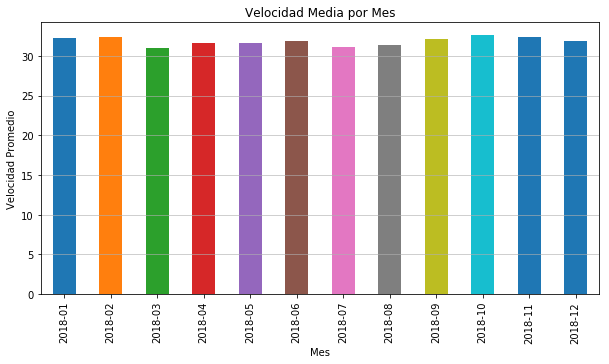

In [10]:
# Obtenemos la data de interes
vf_df = historic_data[["Velocidad_Promedio", "Fecha"]]

# Transformamos la fecha a datetime
vf_df["Fecha"] = pd.to_datetime(vf_df["Fecha"])

# Agregamos una columna mes para poder agrupar la data
vf_df['mes'] = vf_df['Fecha'].dt.month

# Agrupamos por mes, calculamos las medias y ploteamos
vf_df.groupby("mes")["Velocidad_Promedio"].mean().plot.bar(figsize=(10, 5))
plt.title("Velocidad Media por Mes")
plt.xlabel('Mes')
plt.ylabel('Velocidad Promedio')
plt.grid(axis='y', alpha=0.75)

### Analisis por hora del dia

Bar plot de las velocidades medias registradas por hora del dia

C:\Users\Bastolo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Bastolo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


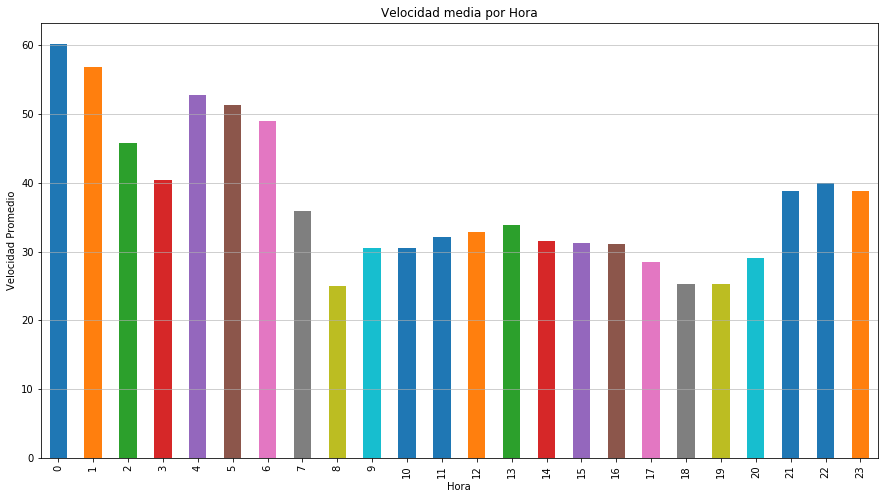

In [11]:
# Obtenemos la data de interes
vh_df = historic_data[["Velocidad_Promedio", "Hora"]]

# Transformamos las horas a datetime 
vh_df["Hora"] = pd.to_datetime(vh_df["Hora"])

# Agregamos la columna hora para podeer agrupar los datos
vh_df["hora"] = vh_df["Hora"].dt.hour

# Agrupamos por hora y ploteamos
vh_df.groupby("hora")["Velocidad_Promedio"].mean().plot.bar(figsize=(15, 8))
plt.title("Velocidad media por Hora")
plt.xlabel('Hora')
plt.ylabel('Velocidad Promedio')
plt.grid(axis='y', alpha=0.75)

+ [Home](https://github.com/yieniggu/CTL-UNAB)
+ [Analisis Univariable de datos historicos](https://github.com/yieniggu/CTL-UNAB/blob/master/historic%20data/Analisis%20Univariable%20de%20la%20data%20Historica.ipynb)